In [1]:
# CNN for Image Classification with Hyperparameter Optimization

In [2]:
# (a) Select a suitable image classification dataset

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


2025-04-18 20:00:26.381477: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/rutulbhosale/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 119s 1us/step


In [3]:
'''
(b) Optimize with hyperparameters
We’ll tweak:
Filter size
Number of layers
Optimizer (Adam vs SGD)
Dropout rate
Learning rate (through optimizer)
'''

'\n(b) Optimize with hyperparameters\nWe’ll tweak:\nFilter size\nNumber of layers\nOptimizer (Adam vs SGD)\nDropout rate\nLearning rate (through optimizer)\n'

In [4]:
# Step 1: Build a CNN Model with Tunable Parameters

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),  # dropout added
    Dense(10, activation='softmax')  # 10 classes
])

# Try tweaking learning rate here
optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


/Users/rutulbhosale/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
 # Step 2: Train the Model

history = model.fit(x_train, y_train_cat, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 62s 85ms/step - accuracy: 0.2736 - loss: 1.9449 - val_accuracy: 0.4868 - val_loss: 1.4348
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 65s 93ms/step - accuracy: 0.4934 - loss: 1.4020 - val_accuracy: 0.5632 - val_loss: 1.2209
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 64s 91ms/step - accuracy: 0.5561 - loss: 1.2469 - val_accuracy: 0.5956 - val_loss: 1.1235
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 63s 90ms/step - accuracy: 0.6018 - loss: 1.1335 - val_accuracy: 0.6372 - val_loss: 1.0363
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 67s 95ms/step - accuracy: 0.6357 - loss: 1.0422 - val_accuracy: 0.6716 - val_loss: 0.9384
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 50s 71ms/step - accuracy: 0.6624 - loss: 0.9622 - val_accuracy: 0.6644 - val_loss: 0.9352
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 51s 73ms/step - accuracy: 0.6806 - loss: 0.9036 - val_accuracy: 0.6864 - val_loss: 0.8887
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 52s 74ms/step - accuracy: 0.7050 - loss: 0.8476 - 

In [7]:
# Step 3: Evaluate the Model

test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7105 - loss: 0.8468
Test Accuracy: 0.7075


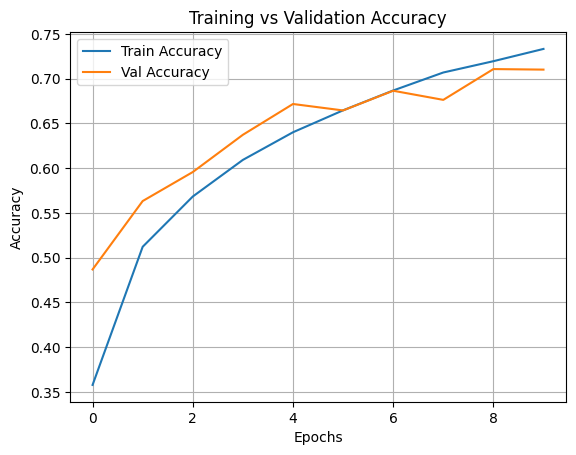

In [8]:
# Step 4: Visualize Performance

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()
